# Análise dos Dados de Infrações de Trânsito de mai/22
<br>
<div style="text-align: right"><b>Lucas Seiti Yamazaki</b></div>
<br>
&nbsp;&nbsp;&nbsp;&nbsp;O Governo do Distrito Federal (GDF) disponibiliza mensalmente em seu site de <a href="http://dados.df.gov.br/dataset/infracoes-transito/resource/48db5ea3-4190-4450-ac81-f1eea813a0e0">dados abertos</a> um relatório consolidado das infrações de trânsito de cada mês. Visando aprimorar políticas públicas direcionadas ao trânsito do Distrito Federal, as análises destas bases é de sumária importância. Delas, alguns <i>insights</i> valiosos podem ser tirados e transformados em melhorias para o cidadão brasiliense.

___

## Informações da Base

In [106]:
# Importando as bibliotecas necessárias
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [58]:
# Leitura dos dados
df = pd.read_csv("http://dados.df.gov.br/dataset/3a3b7b40-c715-439d-9dff-f22b47fc5994/resource/48db5ea3-4190-4450-ac81-f1eea813a0e0/download/dados-abertosmai2022.csv",
                 sep = ";")

In [3]:
# Primeiras 5 observações
df.head()

,tipo_infracao,descricao,tipo_infrator,tipo_veiculo,cometimento,hora_cometimento,auinf_local_rodovia,auinf_local_km,auinf_local_referencia,auinf_local_complemento,auinf_local_latitude,auinf_local_longitude,grav_tipo
0,7579-0,"Recusar-se a ser submetido a teste, exame clín...",Condutor,Caminhonete,01/05/2022,00:00,DF 095,00,Sentido Crescente,NaN,0.0,0.0,Gravíssima
1,7455-0,Transitar em velocidade superior à máxima perm...,Condutor,AUTOMOVEL,01/05/2022,00:00,"DF-001 (EPCT) KM 77,4 (PISTAO NORTE) SENT DF 0...",NaN,NaN,NaN,NaN,NaN,Média
2,7455-0,Transitar em velocidade superior à máxima perm...,Condutor,AUTOMOVEL,01/05/2022,00:01,"DF-002(EIXAO NORTE) KM 5,8 SENTIDO PTE DO BRAG...",NaN,NaN,NaN,NaN,NaN,Média
3,7463-0,Transitar em velocidade superior à máxima perm...,Condutor,UTILITARIO,01/05/2022,00:02,"DF-095 (EPCL) ESTRUTURAL KM 04,9 SENTIDO BIDIR...",NaN,NaN,NaN,NaN,NaN,Grave
4,7471-0,Transitar em velocidade superior à máxima perm...,Condutor,AUTOMOVEL,01/05/2022,00:02,"DF-095 (EPCL) ESTRUTURAL KM 04,9 SENTIDO BIDIR...",NaN,NaN,NaN,NaN,NaN,Gravíssima


In [40]:
# Informações do dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87284 entries, 0 to 87283
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   tipo_infracao            87284 non-null  object 
 1   descricao                87284 non-null  object 
 2   tipo_infrator            87284 non-null  object 
 3   tipo_veiculo             87284 non-null  object 
 4   cometimento              87284 non-null  object 
 5   hora_cometimento         87284 non-null  object 
 6   auinf_local_rodovia      87265 non-null  object 
 7   auinf_local_km           19709 non-null  object 
 8   auinf_local_referencia   19044 non-null  object 
 9   auinf_local_complemento  2517 non-null   object 
 10  auinf_local_latitude     19537 non-null  float64
 11  auinf_local_longitude    19537 non-null  float64
 12  grav_tipo                87284 non-null  object 
dtypes: float64(2), object(11)
memory usage: 8.7+ MB


In [59]:
# Transformando o tipo da coluna "cometimento"
df["cometimento"] = pd.to_datetime(df["cometimento"], format = "%d/%m/%Y")
df[["cometimento"]].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87284 entries, 0 to 87283
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   cometimento  87284 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 682.0 KB


___

## Análise por gráfico de linhas

In [102]:
data = df['cometimento'].value_counts().sort_index()
data = pd.DataFrame(data)
data.head()

,cometimento
2022-05-01,1914
2022-05-02,2483
2022-05-03,2207
2022-05-04,3956
2022-05-05,3061


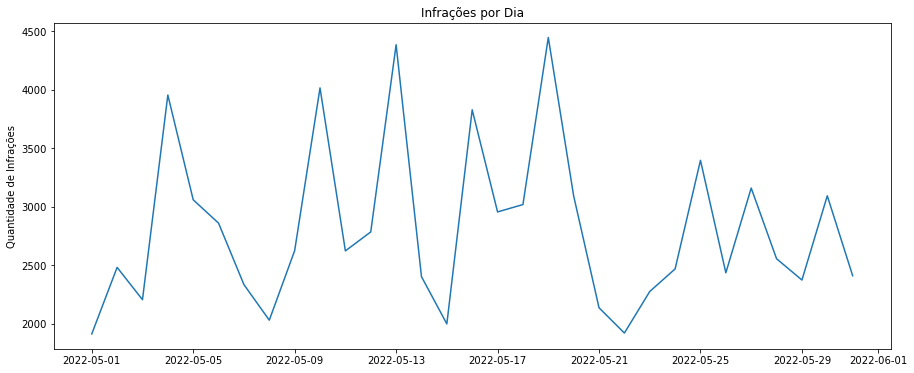

In [169]:
plt.figure(figsize=(15, 6))
sns.lineplot(x = data.index, y = "cometimento", data = data)
plt.title("Infrações por Dia")
plt.ylabel("Quantidade de Infrações")
plt.show()

In [126]:
data["dia_semana"] = data.index.day_name()
data.head()

,cometimento,dia_semana
2022-05-01,1914,Sunday
2022-05-02,2483,Monday
2022-05-03,2207,Tuesday
2022-05-04,3956,Wednesday
2022-05-05,3061,Thursday


___

## Análise por gráficos de barras

In [22]:
tipo_infracao = df['tipo_infracao'].value_counts()[:10]
tipo_infracao = pd.DataFrame(tipo_infracao)
tipo_infracao

,tipo_infracao
7455-0,48557
5681-0,17057
7463-0,3729
5843-4,2598
5843-3,2458
6769-0,2197
7633-2,1816
5185-1,1309
7633-1,1276
5690-0,500


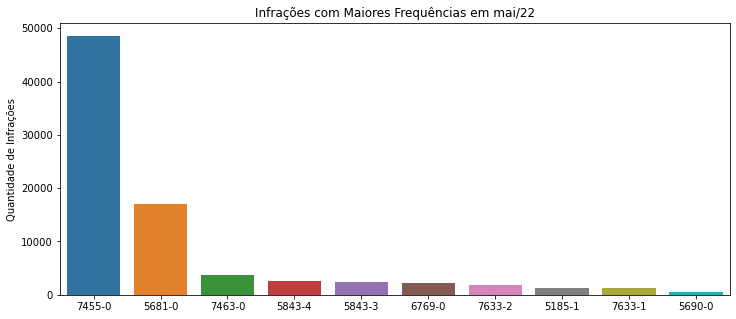

In [167]:
plt.figure(figsize=(12, 5))
sns.barplot(x = tipo_infracao.index, y = "tipo_infracao", data = tipo_infracao)
plt.title("Infrações com Maiores Frequências em mai/22")
plt.ylabel("Quantidade de Infrações")
plt.show()

In [140]:
df["descricao"][df["tipo_infracao"] == "7455-0"].iloc[0]

'Transitar em velocidade superior à máxima permitida em até 20%'

In [143]:
df["descricao"][df["tipo_infracao"] == "5681-0"].iloc[0]

'Transitar na faixa/pista da direita regul circulação exclusiva determ veículo'

Transitar com o veículo na faixa ou na pista da direita regulamentada como de circulação exclusiva para determinado tipo de veículo, exceto para acesso a imóveis lindeiros ou conversões a direita. ([Multas BR](https://www.multasbr.com.br/infracoes/transito/56810/ctb-artigo-184-i))

___

In [152]:
gravidade = df["grav_tipo"].value_counts()
gravidade = pd.DataFrame(gravidade)
gravidade

,grav_tipo
Média,52206
Leve,17270
Grave,12167
Gravíssima,5641


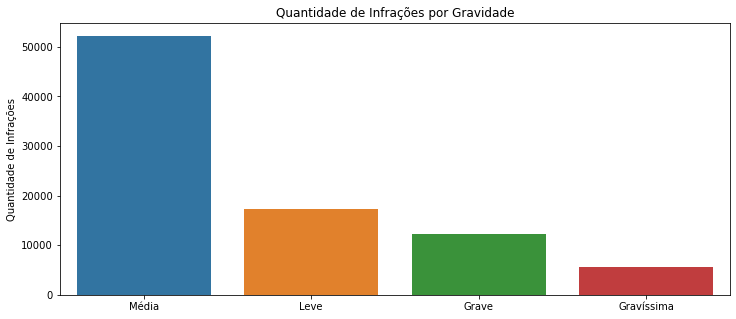

In [166]:
plt.figure(figsize=(12, 5))
sns.barplot(x = gravidade.index, y = "grav_tipo", data = gravidade)
plt.title("Quantidade de Infrações por Gravidade")
plt.ylabel("Quantidade de Infrações")
plt.show()

___

## Análise por *boxplot*

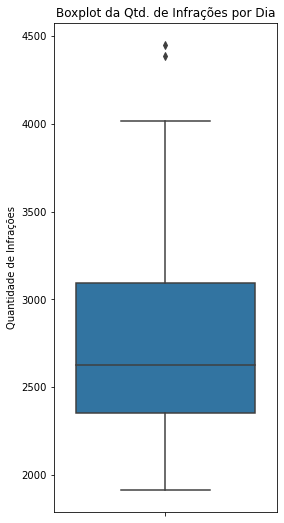

In [165]:
plt.figure(figsize=(4, 9))
sns.boxplot(y = "cometimento", data = data)
plt.title("Boxplot da Qtd. de Infrações por Dia")
plt.ylabel("Quantidade de Infrações")
plt.show()

In [160]:
data.sort_values("cometimento", ascending = False)

,cometimento,dia_semana
2022-05-19,4448,Thursday
2022-05-13,4386,Friday
2022-05-10,4017,Tuesday
2022-05-04,3956,Wednesday
2022-05-16,3830,Monday
2022-05-25,3398,Wednesday
2022-05-27,3161,Friday
2022-05-30,3095,Monday
2022-05-20,3094,Friday
2022-05-05,3061,Thursday
